# Airbnb Prices in Some of The Most Popular European Cities

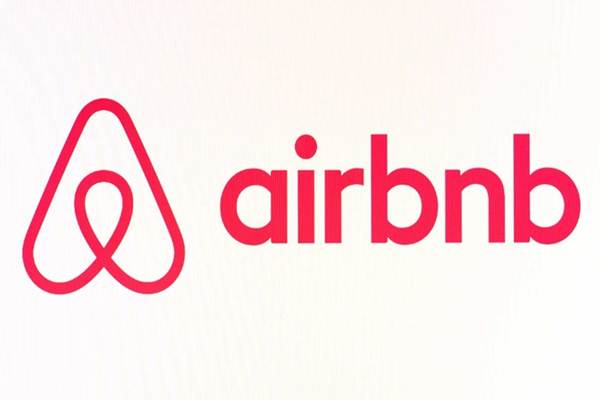

<h3 align="left">About dataset </h3>:

This dataset provides a comprehensive look at Airbnb prices in some of the most popular European cities. Each listing is evaluated for various attributes such as room types, cleanliness and satisfaction ratings, bedrooms, distance from the city centre, and more to capture an in-depth understanding of Airbnb prices on both weekdays and weekends. We hope that this data set offers insight into how global markets are affected by social dynamics and geographical factors which in turn determine pricing strategies for optimal profitability!

**Dataset Column description**:

| Column Name | Description | Data Type |
|-------------|-------------|-----------|
| realSum | The total price of the Airbnb listing | (Numeric) |
| room_type | The type of room being offered (e.g. private, shared, etc.) | (Categorical) |
| room_shared | Whether the room is shared or not | (Boolean) |
| room_private | Whether the room is private or not | (Boolean) |
| person_capacity | The maximum number of people that can stay in the room | (Numeric) |
| host_is_superhost	| Whether the host is a superhost or not | (Boolean) |
| multi | Whether the listing is for multiple rooms or not | (Boolean) |
| biz | Whether the listing is for business purposes or not | (Boolean) |
| cleanliness_rating | The cleanliness rating of the listing | (Numeric) |
| guest_satisfaction_overall | The overall guest satisfaction rating of the listing | (Numeric) |
| bedrooms | The number of bedrooms in the listing | (Numeric) |
| dist | The distance from the city centre | (Numeric) |
| metro_dist | The distance from the nearest metro station | (Numeric) |
| lng | The longitude of the listing | (Numeric) |
| lat | The latitude of the listing | (Numeric) |

Source:

https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

## IMPORT PACKAGE

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from numpy import mean
from numpy import std
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## DATA UNDERSTANDING

In [2]:
df= pd.read_csv('budapest_weekends.csv')

In [3]:
df.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,332.048691,Entire home/apt,False,False,6.0,True,0,1,10.0,99.0,1,0.359372,0.352662,404.398511,24.136091,893.418228,78.100790,19.05074,47.50076
1,1,331.108709,Entire home/apt,False,False,6.0,False,0,1,9.0,98.0,2,0.929438,0.200219,1675.492994,100.000000,452.536452,39.559809,19.04493,47.50405
2,2,243.925365,Entire home/apt,False,False,6.0,False,1,0,10.0,95.0,2,0.674318,0.314709,430.053337,25.667272,698.767674,61.084838,19.04809,47.50297
3,3,206.561075,Entire home/apt,False,False,5.0,True,1,0,10.0,99.0,2,1.338114,0.614128,482.626888,28.805067,371.541633,32.479408,19.03685,47.50104
4,4,238.285473,Entire home/apt,False,False,4.0,False,1,0,9.0,84.0,0,0.835635,0.175568,535.762958,31.976437,534.317055,46.708902,19.04655,47.50398


In [4]:
df= df.drop('Unnamed: 0', axis= 1)
df= df.drop(['attr_index', 'attr_index_norm', 'rest_index','rest_index_norm'], axis= 1)

In [5]:
df.shape

(1948, 15)

In [6]:
df.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
count,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000,1948.000000
mean,185.120628,3.500000,0.308522,0.343943,9.486140,94.647331,1.087782,1.843958,0.530890,19.061170,47.499209
std,135.855683,1.251399,0.462002,0.475144,0.836576,6.520511,0.652123,1.833017,0.812586,0.022627,0.017012
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.062962,0.002301,18.935290,47.396080
25%,128.248813,2.000000,0.000000,0.000000,9.000000,93.000000,1.000000,0.858242,0.225208,19.052413,47.491985
50%,160.031959,4.000000,0.000000,0.000000,10.000000,96.000000,1.000000,1.468258,0.345746,19.060000,47.499895
75%,208.969780,4.000000,1.000000,1.000000,10.000000,99.000000,1.000000,2.151871,0.521585,19.069780,47.507000
max,3751.233727,6.000000,1.000000,1.000000,10.000000,100.000000,3.000000,15.542074,8.359804,19.247000,47.599180


In [7]:
uniq= pd.DataFrame([len(df[df.columns[i]].unique()) for i in range(0,15)], index= df.columns, columns= ['Total Unique'])
uniq

,Total Unique
realSum,714
room_type,3
room_shared,2
room_private,2
person_capacity,5
host_is_superhost,2
multi,2
biz,2
cleanliness_rating,8
guest_satisfaction_overall,34


In [8]:
for x in df:
    display(df[x].value_counts())
    print(df[x].dtypes)
    print("___"*20)

162.381915    28
136.767401    24
116.087794    23
139.117357    22
137.002397    17
              ..
287.634535     1
96.818160      1
290.924472     1
216.900879     1
160.971942     1
Name: realSum, Length: 714, dtype: int64

float64
____________________________________________________________


Entire home/apt    1738
Private room        203
Shared room           7
Name: room_type, dtype: int64

object
____________________________________________________________


False    1941
True        7
Name: room_shared, dtype: int64

bool
____________________________________________________________


False    1745
True      203
Name: room_private, dtype: int64

bool
____________________________________________________________


4.0    779
2.0    595
3.0    276
6.0    194
5.0    104
Name: person_capacity, dtype: int64

float64
____________________________________________________________


False    1189
True      759
Name: host_is_superhost, dtype: int64

bool
____________________________________________________________


0    1347
1     601
Name: multi, dtype: int64

int64
____________________________________________________________


0    1278
1     670
Name: biz, dtype: int64

int64
____________________________________________________________


10.0    1180
9.0      619
8.0      115
7.0       16
6.0        7
2.0        6
4.0        3
5.0        2
Name: cleanliness_rating, dtype: int64

float64
____________________________________________________________


100.0    365
98.0     229
97.0     206
96.0     176
95.0     158
93.0     138
99.0     128
94.0      94
92.0      84
90.0      83
91.0      53
89.0      36
80.0      34
88.0      32
87.0      26
85.0      17
86.0      17
84.0      14
83.0      11
60.0      10
70.0       7
82.0       7
75.0       4
77.0       3
20.0       3
72.0       2
81.0       2
73.0       2
79.0       2
67.0       1
76.0       1
69.0       1
65.0       1
40.0       1
Name: guest_satisfaction_overall, dtype: int64

float64
____________________________________________________________


1    1222
2     390
0     297
3      39
Name: bedrooms, dtype: int64

int64
____________________________________________________________


0.359372    1
0.460582    1
1.431042    1
2.018246    1
0.833256    1
           ..
0.777738    1
0.104991    1
0.497426    1
1.087397    1
1.669965    1
Name: dist, Length: 1948, dtype: int64

float64
____________________________________________________________


0.352662    1
0.126885    1
0.391404    1
0.482555    1
0.289910    1
           ..
0.192806    1
0.158565    1
0.042299    1
0.246041    1
0.272524    1
Name: metro_dist, Length: 1948, dtype: int64

float64
____________________________________________________________


19.05300    28
19.06000    25
19.05500    19
19.05600    18
19.05800    17
            ..
19.06120     1
19.05394     1
19.05960     1
19.06005     1
19.09776     1
Name: lng, Length: 1391, dtype: int64

float64
____________________________________________________________


47.49800    30
47.49900    24
47.50000    24
47.49700    22
47.49600    21
            ..
47.49043     1
47.46792     1
47.46998     1
47.46205     1
47.39608     1
Name: lat, Length: 1350, dtype: int64

float64
____________________________________________________________


## EDA

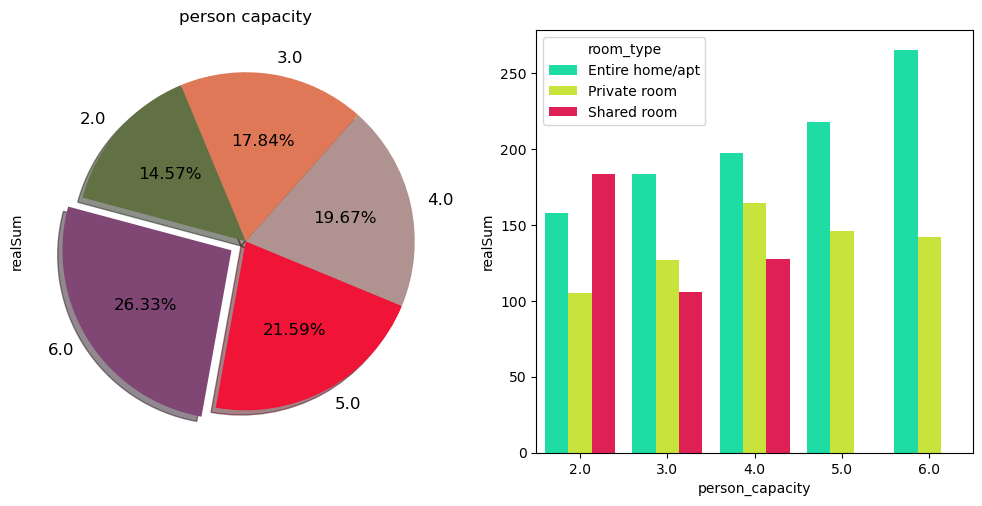

In [9]:
capacity= pd.DataFrame(df.groupby(['person_capacity', 'room_type'])['realSum'].mean()).reset_index()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,5))

df.groupby('person_capacity')['realSum'].mean().sort_values(ascending= False).plot.pie(shadow = True, explode=[0.1, 0,0,0,0],
                                        autopct='%.2f%%', textprops={'fontsize':12}, 
                                        startangle=165, colors=['#804674', '#F01436', '#b09391', '#DF7857', '#617143'], ax= ax1)
sns.barplot(x= 'person_capacity', y='realSum', hue='room_type', data= capacity, palette= 'gist_ncar', ax= ax2)
ax1.set_title('person capacity')

plt.tight_layout();

insights:
- The fewer rooms that can be occupied by people, the lower average price is as well.
- The highest average price is for a room that can be filled with a maximum of 6 people.
- Depending on the type of room, Entire home room types tend to be more expensive than other room types. But in a capacity filled with two people, in a shared room, prices tend to be more expensive. This can happen because visitors or travelers order 1 room but ask for additional bed facilities or request a smoking room with a larger room, which is more expensive than the entire home, and this additional fee is a strategy from the Airbnb host itself.

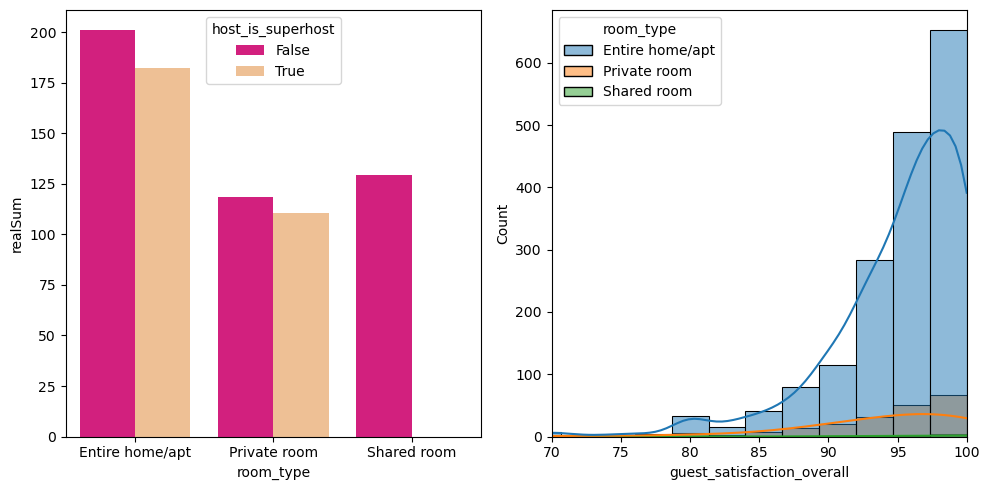

In [10]:
income= df.groupby(['room_type','host_is_superhost'])['realSum'].mean()
income= pd.DataFrame(income).reset_index()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(10,5))

sns.barplot(x=income['room_type'], y=income['realSum'], hue=income['host_is_superhost'], palette= 'Accent_r', ax= ax1)
sns.histplot(x= 'guest_satisfaction_overall', hue='room_type', data= df, bins= 30, kde= True, ax= ax2)
ax2.set_xlim((70,100))
plt.tight_layout();

insights:
- Hosts have the highest average income in the room type. Entire home/apt. This is very common, because it was reported by a source who said only 19.4% of hosts achieve the status of "Superhost" (source: hospitable.com). The title "Superhostitself is a badge of honor given to Airbnb hosts that meet certain strict criteria.
- The average visitor gives a high rating of around 95–100, with a high number of entires or apartments.This is sufficient to prove that the customer is satisfied with the existing services and facilities.

### DATA PREPROCESSING

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop('realSum', axis=1)
y = np.log(df['realSum'])

### FEATURE SELECTION

In [13]:
vif_=X[['person_capacity', 'multi', 'biz','cleanliness_rating',  'guest_satisfaction_overall',
                      'bedrooms', 'dist', 'metro_dist', 'lng','lat']]
vif = pd.DataFrame()
vif["variables"] = vif_.columns
vif["VIF"] = [variance_inflation_factor(vif_.values, i).round(2) for i in range(vif_.shape[1])]
vif  

,variables,VIF
0,person_capacity,12.65
1,multi,1.92
2,biz,2.12
3,cleanliness_rating,252.52
4,guest_satisfaction_overall,415.60
5,bedrooms,5.41
6,dist,7.70
7,metro_dist,4.65
8,lng,730752.11
9,lat,729905.45


In [14]:
mapping= {True: 1, False: 0}
rt= {'Entire home/apt': 2, 'Private room': 1,'Shared room': 0}
X['room_type']= X['room_type'].map(rt)
X['room_shared']= X['room_shared'].map(mapping)
X['room_private']= X['room_private'].map(mapping)
X['host_is_superhost']= X['host_is_superhost'].map(mapping)
X.head()

,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,lng,lat
0,2,0,0,6.0,1,0,1,10.0,99.0,1,0.359372,0.352662,19.05074,47.50076
1,2,0,0,6.0,0,0,1,9.0,98.0,2,0.929438,0.200219,19.04493,47.50405
2,2,0,0,6.0,0,1,0,10.0,95.0,2,0.674318,0.314709,19.04809,47.50297
3,2,0,0,5.0,1,1,0,10.0,99.0,2,1.338114,0.614128,19.03685,47.50104
4,2,0,0,4.0,0,1,0,9.0,84.0,0,0.835635,0.175568,19.04655,47.50398


In [15]:
X= X.drop(['host_is_superhost','lng','lat'], axis= 1)

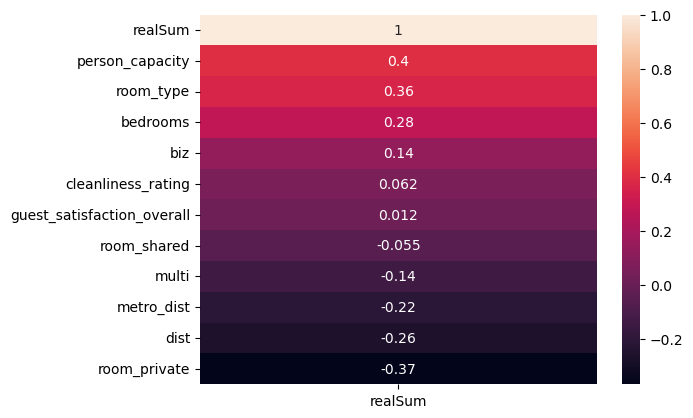

In [16]:
gabung= X.join(y)
gabung
sns.heatmap(gabung.corr()[['realSum']].sort_values(by= ['realSum'], ascending= False), annot = True);

## SPLIT DATA

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model 1 (Linear Regression)

In [18]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [20]:
print('R2 score:',(r2_score(y_test,y_pred)))
print('mape score:',mape(y_test,y_pred))
print('mae score:',mae(y_test,y_pred))
print('rmse score:',mse(y_test,y_pred,squared=False))
print('mse score:',mse(y_test,y_pred))

R2 score: 0.3421413653293943
mape score: 0.050534485595070525
mae score: 0.26019991793424074
rmse score: 0.3502421701408209
mse score: 0.1226695777449517


In [21]:
lr.score(X_test, y_test), lr.score(X_train, y_train)

(0.3421413653293943, 0.27699409016704024)

- The data shows the occurrence of Underfitting and the resulting error percentage is 5%. This data underfitting occurs, there could be Data Leakage.

## STATMODELS

In [22]:
import statsmodels.api as sm

In [23]:
x1 = sm.add_constant(X_train)
results = sm.OLS(y_train,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realSum   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     51.80
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           3.18e-88
Time:                        13:46:24   Log-Likelihood:                -569.43
No. Observations:                1363   AIC:                             1161.
Df Residuals:                    1352   BIC:                             1218.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          2.5609      0.116     22.160      0.000       2.334       2.788
room_type                      0.9890      0.044     22.466      0.000       0.903       1.075
room_shared                    1.7388      0.114     15.296      0.000       1.516       1.962
room_private                   0.6550      0.052     12.678      0.000       0.554       0.756
person_capacity                0.0683      0.010      6.853      0.000       0.049       0.088
multi                         -0.0208      0.025     -0.837      0.403      -0.070       0.028
biz                            0.0616      0.025      2.470      0.014       0.013       0.111
cleanliness_rating             0.0524      0.016      3.279      0.001       0.021       0.084
guest_satisfaction_overall    -0.0020      0.002     -0.907      0.365      -0.006       0.002
bedrooms                       0.1224      0.018      6.643      0.000       0.086       0.159
dist                          -0.0589      0.010     -6.157      0.000      -0.078      -0.040
metro_dist                     0.0373      0.021      1.784      0.075      -0.004       0.078
==============================================================================
Omnibus:                      421.936   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2420.857
Skew:                           1.316   Prob(JB):                         0.00
Kurtosis:                       8.975   Cond. No.                     4.41e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
sum=[]
sum= pd.DataFrame()
sum['pval']=results.pvalues.round(5)
sum['param']= results.params.round(5)
sum[sum['pval']<0.05]

,pval,param
const,0.00000,2.56085
room_type,0.00000,0.98901
room_shared,0.00000,1.73883
room_private,0.00000,0.65503
person_capacity,0.00000,0.06830
biz,0.01364,0.06163
cleanliness_rating,0.00107,0.05240
bedrooms,0.00000,0.12244
dist,0.00000,-0.05888


## K-FOLD

In [25]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)
model = LinearRegression()

scores = cross_val_score(model, X, y, scoring='r2',
                         cv=cv, n_jobs=-1)
cnt= 1
for train_index, test_index in cv.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1
print('R squared: %.3f (%.3f)' % (mean(scores), std(scores)))

Fold:1, Train set: 1558, Test set:390
Fold:2, Train set: 1558, Test set:390
Fold:3, Train set: 1558, Test set:390
Fold:4, Train set: 1559, Test set:389
Fold:5, Train set: 1559, Test set:389
R squared: 0.285 (0.076)


<Figure size 640x480 with 0 Axes>

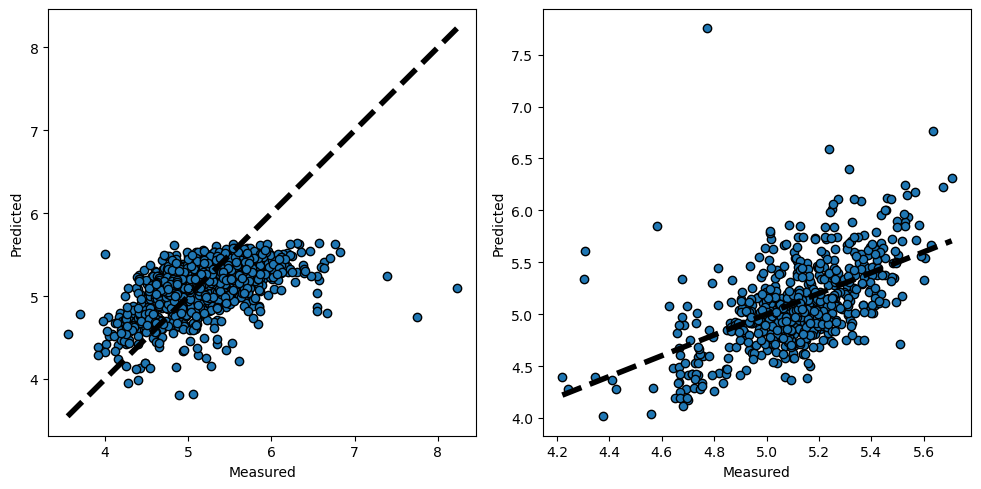

In [26]:
from sklearn.model_selection import cross_val_predict
plt.suptitle('Comparative study of K-Fold and Linear ')

predicted= cross_val_predict(model, X,y, cv= 5)
fig, (ax1,ax2)= plt.subplots(1,2, figsize= (10,5))
ax1.scatter(y, predicted, edgecolors=(0,0,0))
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw= 4)
ax1.set_xlabel('Measured')
ax1.set_ylabel('Predicted')

ax2.scatter(y_pred, y_test, edgecolors=(0,0,0))
ax2.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'k--', lw= 4)
ax2.set_xlabel('Measured')
ax2.set_ylabel('Predicted')

plt.tight_layout()
plt.show()


- The K-fold results show a fairly better distribution than the Linear Regression results.
Accuracy on training and test data could be poor because the learning algorithm did not have enough data to learn from. You could improve performance by doing the following:
Increase the amount of training data examples.

## Residual Analysis

In [27]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Coefficient'] = lr.coef_
reg_summary

,Features,Coefficient
0,room_type,0.135391
1,room_shared,0.031599
2,room_private,-0.198589
3,person_capacity,0.068301
4,multi,-0.020849
5,biz,0.061631
6,cleanliness_rating,0.052402
7,guest_satisfaction_overall,-0.001960
8,bedrooms,0.122441
9,dist,-0.058881


In [28]:
df_pf = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,140.229246,NaN
1,140.260582,NaN
2,188.232819,243.925365
3,220.024715,NaN
4,192.555185,NaN
...,...,...
580,169.764781,NaN
581,208.526307,NaN
582,192.749551,295.389388
583,178.158212,108.097946


In [29]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    5.252542
1    5.089951
2    5.082689
3    5.235172
4    4.935318
Name: realSum, dtype: float64

In [30]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [31]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,140.229246,NaN,NaN,NaN
1,140.260582,NaN,NaN,NaN
2,188.232819,243.925365,55.692547,22.831798
3,220.024715,NaN,NaN,NaN
4,192.555185,NaN,NaN,NaN
...,...,...,...,...
580,169.764781,NaN,NaN,NaN
581,208.526307,NaN,NaN,NaN
582,192.749551,295.389388,102.639837,34.747300
583,178.158212,108.097946,-70.060266,64.811838


<AxesSubplot:xlabel='Residual', ylabel='Count'>

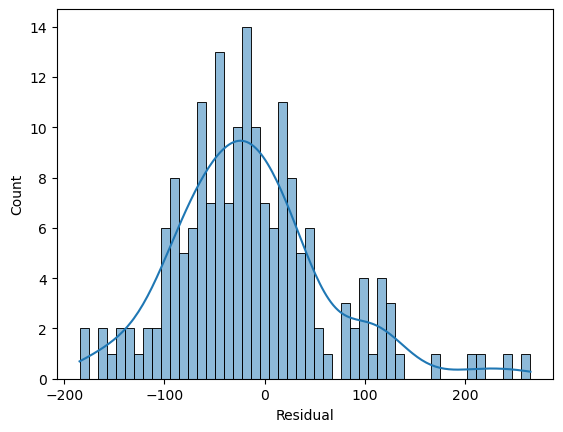

In [32]:
sns.histplot(df_pf['Residual'], bins= 50, kde= True)

insights:
It can be seen that the distribution is not close to 0 and is far apart because of the underfit prediction results.

## CONCLUSION

1. The fewer rooms that can be occupied by people, the lower average price is as well. Entire home room types tend to be more expensive than other room types also get added fee for additional bed facilities or request a smoking room with a larger room.
2. Hosts have the highest average income in the room type. Entire home/apt. This is very common, because it was reported by a source who said only 19.4% of hosts achieve the status of "Superhost".
3. R2 yield of 34% with training data of 27%, Underfitting data which requires more input features or reduces variance. to predict the model or classify the model well.
4. R2 of the K-Fold results is 28% with an error percentage of 7%. has less accuracy than the results of Linear Regression.
5. The Linear Regression model is better than the Kfold because the k-fold method is quite effective in dealing with overfitting.